(Coding source)[https://www.youtube.com/watch?v=PuZY9q-aKLw]


In [ ]:
# Importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import yfinance as yfin
yfin.pdr_override()

import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
# Load Data
company = 'Meta'

start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = pdr.data.get_data_yahoo(company, start, end)


In [24]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [27]:
# Build The Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Prediction of the next closing values

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
59/59 [==============================] - 23s 135ms/step - loss: 0.0248
Epoch 2/25
59/59 [==============================] - 8s 143ms/step - loss: 0.0045
Epoch 3/25
59/59 [==============================] - 8s 133ms/step - loss: 0.0040
Epoch 4/25
59/59 [==============================] - 8s 127ms/step - loss: 0.0037
Epoch 5/25
59/59 [==============================] - 7s 115ms/step - loss: 0.0033
Epoch 6/25
59/59 [==============================] - 9s 144ms/step - loss: 0.0030
Epoch 7/25
59/59 [==============================] - 9s 149ms/step - loss: 0.0035
Epoch 8/25
59/59 [==============================] - 10s 165ms/step - loss: 0.0033
Epoch 9/25
59/59 [==============================] - 8s 141ms/step - loss: 0.0028
Epoch 10/25
59/59 [==============================] - 10s 168ms/step - loss: 0.0030
Epoch 11/25
59/59 [==============================] - 10s 164ms/step - loss: 0.0026
Epoch 12/25
59/59 [==============================] - 9s 160ms/step - loss: 0.0023
Epoch 13/25
59/59 [==

In [29]:
# Load Test Data
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

test_data = pdr.data.get_data_yahoo(company, test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

[*********************100%***********************]  1 of 1 completed


In [31]:
# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

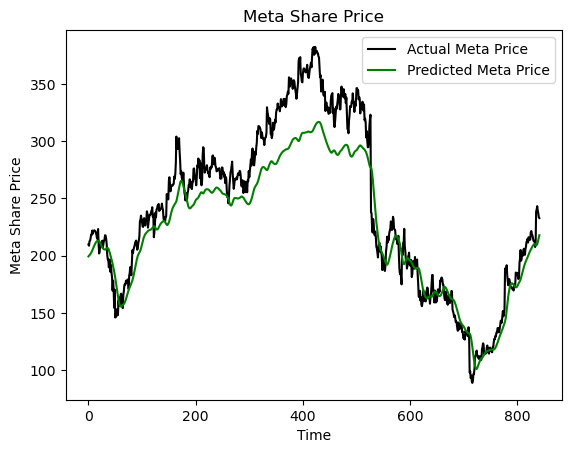

In [32]:
# Plot The Test Predictions
plt.plot(actual_prices, color='black', label=f'Actual {company} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

904

In [43]:
len(model_inputs)
model_inputs.shape

(902, 1)

In [45]:
real_data.shape

(1, 59, 1)

In [52]:
(len(model_inputs) - prediction_days) - len(model_inputs+ 1)

-60

In [53]:
# Predict Next Day
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+ 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')

Prediction: [[219.5899]]
